In [1]:
#Import qiskit
from qiskit import *

In [2]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")      # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)


Step 1. 

Bob and Alice shared an entangled pair of qubits.
The pair is called a Bell pair. 

Process for creating a Bell pair between two qubits:
1. transfer one of them to the X-basis (|+⟩ and |−⟩) using a Hadamard gate. 
2. And then apply a CNOT gate onto the other qubit(q2) controlled by q1 in the X-basis.
Note: If q1 = 1, then q2 will flip otherwise q2 will not change.


In [4]:
def create_bell_pair(qc, q1, q2):
    """Creates a bell pair in qc using qubits q1 & q2"""
    qc.h(q1)     # Put qubit a into state |+>  
    qc.cx(q1,q2) # CNOT with q1 as control and q2 as target 
    

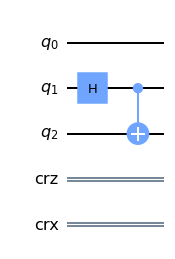

In [5]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
#  qubit q1 and qubit q2 are entangled

# Let's apply the process above to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)

# View the circuit so far:
%matplotlib inline
teleportation_circuit.draw(output='mpl')


Step 2. 

Alice applies a CNOT gate to q1, controlled by |ψ⟩(the qubit she is trying to send Bob). 
Then Alice applies a Hadamard gate to |ψ⟩. 
In our quantum circuit, the qubit (|ψ⟩) Alice is trying to send is q0:


In [7]:
def alice_gates(qc, q0, q1):
    qc.cx(q0, q1)
    qc.h(q0)
    

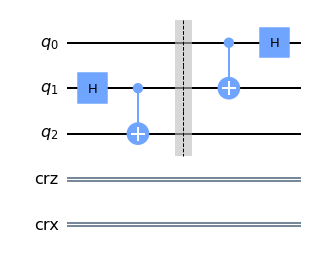

In [8]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')


Step 3. 

Next, Alice applies a measurement to both qubits that she owns,  
q1 and |ψ⟩, and stores this result in two classical bits. She then sends these two bits to Bob.


In [10]:
def measure_and_send(qc, q1, q2):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(q1,0)
    qc.measure(q2,1)
    

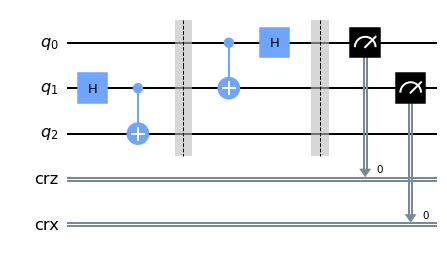

In [11]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output='mpl')


Step 4. 

Bob, who already has the qubit q2, then applies the following gates depending on the state of the classical bits:

00  → Do nothing

01  → Apply X gate

10  → Apply Z gate

11  → Apply ZX gate



In [13]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'
    

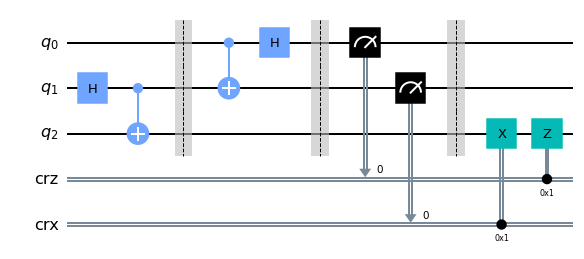

In [14]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw(output='mpl')
